<a href="https://colab.research.google.com/github/ahwarkhan/DL-IID/blob/main/UNSW_NB15__DL_IID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5e5d2435c81d56ee24cf6fbfc3b3eb8f6167968ee13c2373c89a50999763f15e
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
import psutil
import time
import random
import math
import lime
import lime.lime_tabular

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/autoencoder_paper/dataset/UNSW_NB15.csv')

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,175341.0,8.767100e+04,5.061673e+04,1.0,43836.000000,87671.000000,1.315060e+05,1.753410e+05
dur,175341.0,1.359389e+00,6.480249e+00,0.0,0.000008,0.001582,6.680690e-01,5.999999e+01
spkts,175341.0,2.029866e+01,1.368876e+02,1.0,2.000000,2.000000,1.200000e+01,9.616000e+03
dpkts,175341.0,1.896959e+01,1.102583e+02,0.0,0.000000,2.000000,1.000000e+01,1.097400e+04
sbytes,175341.0,8.844844e+03,1.747656e+05,28.0,114.000000,430.000000,1.418000e+03,1.296523e+07
dbytes,175341.0,1.492892e+04,1.436542e+05,0.0,0.000000,164.000000,1.102000e+03,1.465555e+07
rate,175341.0,9.540619e+04,1.654010e+05,0.0,32.786140,3225.806520,1.250000e+05,1.000000e+06
sttl,175341.0,1.795470e+02,1.029400e+02,0.0,62.000000,254.000000,2.540000e+02,2.550000e+02
dttl,175341.0,7.960957e+01,1.105069e+02,0.0,0.000000,29.000000,2.520000e+02,2.540000e+02
sload,175341.0,7.345403e+07,1.883574e+08,0.0,13053.338870,879674.750000,8.888889e+07,5.988000e+09


In [ ]:
dataset.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [ ]:
dataset.shape

(175341, 45)

In [ ]:
dataset.isnull().sum()

,0
id,0
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0


In [ ]:
dataset.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [ ]:
dataset['label'].value_counts()

,count
label,
1,119341
0,56000


In [ ]:
for column in dataset.columns:
  print(f"{column}: {dataset[column].nunique()}")

id: 175341
dur: 74039
proto: 133
service: 13
state: 9
spkts: 480
dpkts: 443
sbytes: 7214
dbytes: 6660
rate: 76991
sttl: 11
dttl: 6
sload: 80885
dload: 77474
sloss: 409
dloss: 370
sinpkt: 76161
dinpkt: 74245
sjit: 77532
djit: 76831
swin: 13
stcpb: 75265
dtcpb: 75089
dwin: 7
tcprtt: 43319
synack: 40142
ackdat: 37708
smean: 1357
dmean: 1328
trans_depth: 11
response_body_len: 2386
ct_srv_src: 52
ct_state_ttl: 5
ct_dst_ltm: 50
ct_src_dport_ltm: 47
ct_dst_sport_ltm: 32
ct_dst_src_ltm: 54
is_ftp_login: 4
ct_ftp_cmd: 4
ct_flw_http_mthd: 11
ct_src_ltm: 50
ct_srv_dst: 52
is_sm_ips_ports: 2
attack_cat: 10
label: 2


In [ ]:
X = dataset.drop(['label'], axis=1)
y = dataset['label']

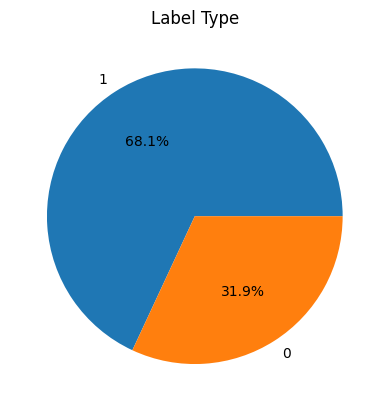

In [ ]:
graph_labels = '1', '0'
graph_y = y.value_counts()
fig, ax = plt.subplots()
ax.pie(graph_y, labels=graph_labels, autopct='%1.1f%%')
plt.title('Label Type')
plt.show()

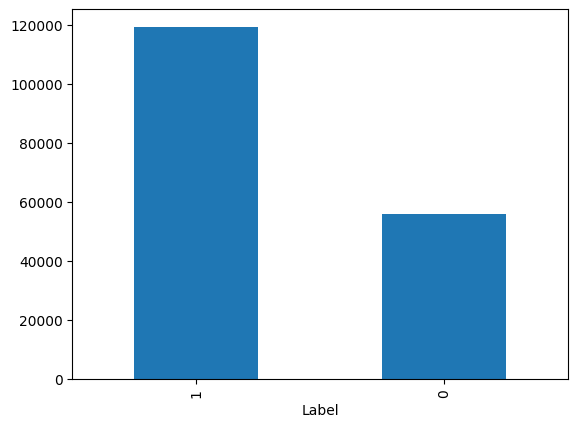

In [ ]:
graph_y.plot(kind='bar', xlabel='Label')
plt.show()

In [ ]:
X = X.replace([np.inf, -np.inf], np.nan)

In [ ]:
encoder = LabelEncoder()

for column in X.select_dtypes(include=['object']).columns:
  X[column] = encoder.fit_transform(X[column])

In [ ]:
X.fillna(X.mean(), inplace=True)

In [ ]:
X.shape

(175341, 44)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [ ]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        assert len(self.X) == len(self.y)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.y.iloc[idx]
        return x, y

In [ ]:
train_dataset = MyDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = MyDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
val_dataset = MyDataset(X_val, y_val)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### DNN-BiLSTM

In [ ]:
class DNNBiLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, lstm_layers, output_size):
        super(DNNBiLSTM, self).__init__()

        self.fc1 = nn.Linear(input_size, 128)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.relu2 = nn.ReLU()

        self.lstm = nn.LSTM(input_size=64, hidden_size=hidden_size,
                            num_layers=lstm_layers, batch_first=True,
                            bidirectional=True)

        self.fc3 = nn.Linear(hidden_size * 2, output_size)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = x.float()
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = x.unsqueeze(1)
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out[:, -1, :]

        x = self.fc3(lstm_out)
        return self.softmax(x)

    def predict_proba(self, x):
      with torch.no_grad():
          x = torch.tensor(x, dtype=torch.float32)
          output = self.forward(x)
          probabilities = F.softmax(output, dim=1).numpy()
          return probabilities

In [ ]:
def train(model, train_loader, val_loader, criterion, optimizer, num_epochs=50):
    train_losses, val_losses = [], []
    train_accuracies, val_accuracies = [], []

    for epoch in range(num_epochs):
        model.train()
        total_train_loss, correct_train, total_samples = 0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            total_train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct_train += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        train_loss = total_train_loss / len(train_loader)
        train_accuracy = (correct_train / total_samples) * 100

        # Validation Phase
        model.eval()
        total_val_loss, correct_val, total_val_samples = 0, 0, 0

        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                total_val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct_val += (predicted == labels).sum().item()
                total_val_samples += labels.size(0)

        val_loss = total_val_loss / len(val_loader)
        val_accuracy = (correct_val / total_val_samples) * 100

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accuracies.append(train_accuracy)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch+1}/{num_epochs} | "
              f"Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f} | "
              f"Train Acc: {train_accuracy:.2f}% | Val Acc: {val_accuracy:.2f}%")

    return train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
def plot_performance(train_losses, val_losses, train_acc, val_acc):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Loss Plot
    axes[0].plot(train_losses, label="Train Loss", color='blue')
    axes[0].plot(val_losses, label="Validation Loss", color='red')
    axes[0].set_title("Loss Curve")
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss")
    axes[0].legend()

    # Accuracy Plot
    axes[1].plot(train_acc, label="Train Accuracy", color='blue')
    axes[1].plot(val_acc, label="Validation Accuracy", color='red')
    axes[1].set_title("Accuracy Curve")
    axes[1].set_xlabel("Epochs")
    axes[1].set_ylabel("Accuracy (%)")
    axes[1].legend()

    plt.show()

In [ ]:
input_size = X_train.shape[1]
hidden_size = 64
lstm_layers = 1
output_size = 2
batch_size = 128
num_epochs = 20
learning_rate = 0.0001

In [ ]:
model = DNNBiLSTM(input_size, hidden_size, lstm_layers, output_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
train_losses, val_losses, train_acc, val_acc = train(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch 1/20 | Train Loss: 0.3827 | Val Loss: 0.3351 | Train Acc: 94.16% | Val Acc: 97.84%
Epoch 2/20 | Train Loss: 0.3303 | Val Loss: 0.3267 | Train Acc: 98.32% | Val Acc: 98.61%
Epoch 3/20 | Train Loss: 0.3230 | Val Loss: 0.3199 | Train Acc: 99.03% | Val Acc: 99.34%
Epoch 4/20 | Train Loss: 0.3184 | Val Loss: 0.3158 | Train Acc: 99.49% | Val Acc: 99.78%
Epoch 5/20 | Train Loss: 0.3152 | Val Loss: 0.3145 | Train Acc: 99.83% | Val Acc: 99.89%
Epoch 6/20 | Train Loss: 0.3143 | Val Loss: 0.3149 | Train Acc: 99.91% | Val Acc: 99.83%
Epoch 7/20 | Train Loss: 0.3140 | Val Loss: 0.3139 | Train Acc: 99.93% | Val Acc: 99.94%
Epoch 8/20 | Train Loss: 0.3138 | Val Loss: 0.3139 | Train Acc: 99.95% | Val Acc: 99.94%
Epoch 9/20 | Train Loss: 0.3138 | Val Loss: 0.3138 | Train Acc: 99.95% | Val Acc: 99.95%
Epoch 10/20 | Train Loss: 0.3137 | Val Loss: 0.3141 | Train Acc: 99.96% | Val Acc: 99.93%
Epoch 11/20 | Train Loss: 0.3136 | Val Loss: 0.3140 | Train Acc: 99.97% | Val Acc: 99.93%
Epoch 12/20 | Train

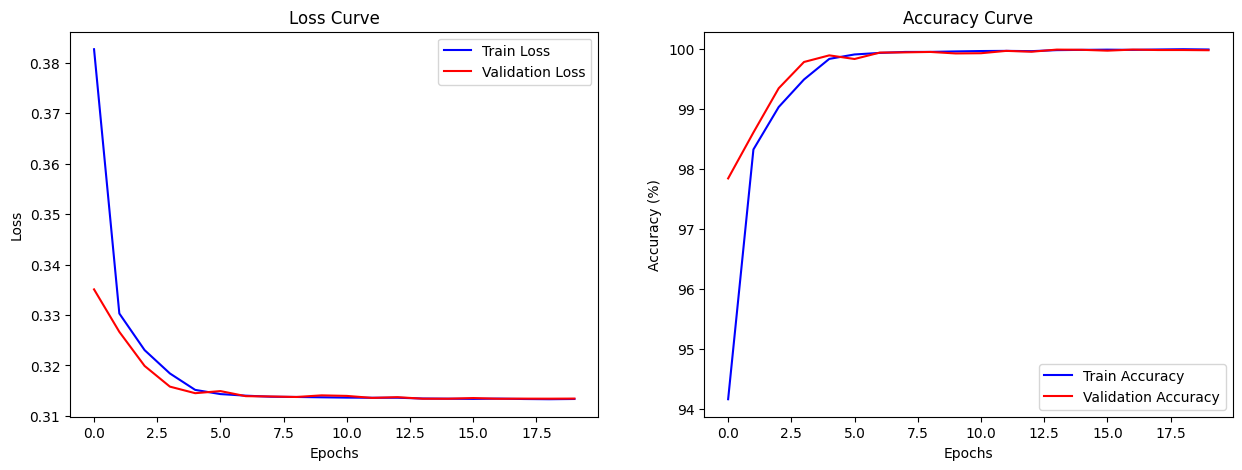

In [ ]:
plot_performance(train_losses, val_losses, train_acc, val_acc)

In [ ]:
def evaluate_model(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    predictions = []
    labels = []

    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
        for x, y in test_loader:
            x, y = x.to(device, dtype=torch.float32), y.to(device, dtype=torch.long)
            outputs = model(x)
            loss = criterion(outputs, y)
            test_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct += (predicted == y).sum().item()

            predictions.extend(predicted.cpu().numpy())
            labels.extend(y.cpu().numpy())

    # Convert to numpy arrays
    labels_array = np.array(labels)
    predictions_array = np.array(predictions)

    # Compute evaluation metrics
    accuracy = correct / len(test_loader.dataset)
    precision = precision_score(labels, predictions, zero_division=False)
    recall = recall_score(labels, predictions, zero_division=False)
    f1 = f1_score(labels, predictions, zero_division=False)

    # Compute error metrics
    MSE = mean_squared_error(labels_array, predictions_array)
    RMSE = np.sqrt(MSE)
    MAE = mean_absolute_error(labels_array, predictions_array)

    safe_labels = np.where(labels_array == 0, np.nan, labels_array)
    MAPE = np.nanmean(np.abs((labels_array - predictions_array) / safe_labels)) * 100

    # System Resource Utilization
    process = psutil.Process()
    cpu_utilization = psutil.cpu_percent(interval=1)
    memory_usage = process.memory_info().rss / 1024  # Convert to KB

    # Print Results
    print("\n--- Evaluation Metrics ---")
    print(f"Test Loss: {test_loss / len(test_loader):.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\n--- Error Metrics ---")
    print(f"Mean Absolute Error (MAE): {MAE:.4f}")
    print(f"Mean Squared Error (MSE): {MSE:.4f}")
    print(f"Root Mean Squared Error (RMSE): {RMSE:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {MAPE:.2f}%")

    print("\n--- System Resource Utilization ---")
    print(f"CPU Utilization: {cpu_utilization}%")
    print(f"Memory Usage: {memory_usage:.2f} KB")

    # Print Classification Report
    print("\n--- Classification Report ---")
    print(classification_report(labels, predictions, target_names=['Benign', 'DDoS']))

    # Plot Confusion Matrix
    conf_matrix = confusion_matrix(labels, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Benign', 'DDoS'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()


--- Evaluation Metrics ---
Test Loss: 0.3133
Test Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

--- Error Metrics ---
Mean Absolute Error (MAE): 0.0000
Mean Squared Error (MSE): 0.0000
Root Mean Squared Error (RMSE): 0.0000
Mean Absolute Percentage Error (MAPE): 0.00%

--- System Resource Utilization ---
CPU Utilization: 2.0%
Memory Usage: 939100.00 KB

--- Classification Report ---
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     11169
        DDoS       1.00      1.00      1.00     23900

    accuracy                           1.00     35069
   macro avg       1.00      1.00      1.00     35069
weighted avg       1.00      1.00      1.00     35069



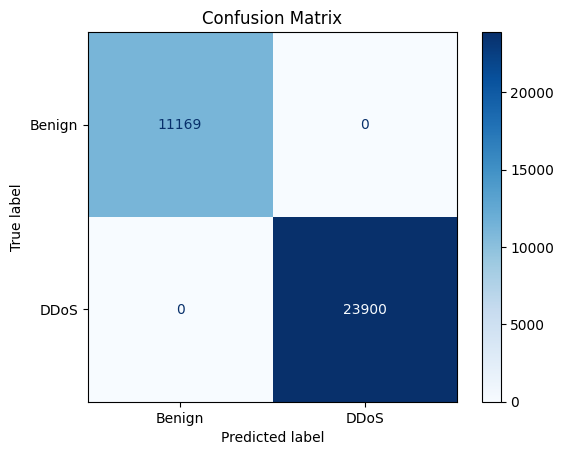

In [ ]:
evaluate_model(model, test_loader)

###Fitness (Objective) Function

In [ ]:
def train_on_selected_features(selected_features, X, y, epochs=50, batch_size=128):
    selected_features_indices = np.where(selected_features)[0]
    X_selected = X.iloc[:, selected_features_indices]

    scaler = StandardScaler()
    X_selected = scaler.fit_transform(X_selected)

    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    train_dataset1 = MyDataset(X_train, y_train)
    train_loader1 = DataLoader(train_dataset1, batch_size=64, shuffle=True)
    val_dataset1 = MyDataset(X_val, y_val)
    val_loader1 = DataLoader(val_dataset1, batch_size=64, shuffle=False)

    input_size = X_train.shape[1]
    hidden_size = 64
    lstm_layers = 1
    output_size = 2
    model = DNNBiLSTM(input_size, hidden_size, lstm_layers, output_size).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for batch in train_loader1:
            x, y = batch
            y = y.long()
            optimizer.zero_grad()
            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        model.eval()
        val_loss = 0
        correct = 0

        with torch.no_grad():
            for batch in val_loader1:
                x, y = batch
                y = y.long()
                outputs = model(x)
                loss = criterion(outputs, y)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                correct += (predicted == y).sum().item()

        accuracy = correct / len(val_dataset1)

        return 1 - accuracy

In [ ]:
class solution:
    def __init__(self):
        self.best = 0
        self.bestIndividual = []
        self.convergence = []
        self.optimizer = ""
        self.objfname = ""
        self.startTime = 0
        self.endTime = 0
        self.executionTime = 0
        self.lb = 0
        self.ub = 0
        self.dim = 0
        self.popnum = 0
        self.maxiers = 0

### GA

In [ ]:
def crossover(individualLength, parent1, parent2):
    crossover_point = random.randint(1, individualLength - 1)
    offspring1 = np.concatenate([parent1[:crossover_point], parent2[crossover_point:]])
    offspring2 = np.concatenate([parent2[:crossover_point], parent1[crossover_point:]])
    return offspring1, offspring2

In [ ]:
def mutation(individual, individualLength, lb, ub):
    mutationIndex = random.randint(0, individualLength - 1)
    individual[mutationIndex] = 1 - individual[mutationIndex]

In [ ]:
def pairSelection(population, scores, popSize):
    def rouletteWheelSelectionId(scores, popSize):
        total_fitness = sum(scores)
        normalized_scores = [score / total_fitness for score in scores]
        cumulative_probs = np.cumsum(normalized_scores)
        random_num = random.random()
        for i, cumulative_prob in enumerate(cumulative_probs):
            if random_num <= cumulative_prob:
                return i

    parent1Id = rouletteWheelSelectionId(scores, popSize)
    parent1 = population[parent1Id].copy()

    parent2Id = parent1Id
    while parent2Id == parent1Id:
        parent2Id = rouletteWheelSelectionId(scores, popSize)

    parent2 = population[parent2Id].copy()

    return parent1, parent2

In [ ]:
def mutatePopulaton(population, popSize, mutationProbability, keep, lb, ub):
    for i in range(keep, popSize):
        if random.random() < mutationProbability:
            mutation(population[i], len(population[i]), lb, ub)

In [ ]:
def sortPopulation(population, scores):
    sorted_indices = scores.argsort()
    population = population[sorted_indices]
    scores = scores[sorted_indices]
    return population, scores

In [ ]:
def crossoverPopulaton(population, scores, popSize, crossoverProbability, keep):
    newPopulation = np.zeros_like(population)
    newPopulation[:keep] = population[:keep]

    for i in range(keep, popSize, 2):
        parent1, parent2 = pairSelection(population, scores, popSize)
        individualLength = len(parent1)

        if random.random() < crossoverProbability:
            offspring1, offspring2 = crossover(individualLength, parent1, parent2)
        else:
            offspring1, offspring2 = parent1.copy(), parent2.copy()

        newPopulation[i] = offspring1
        if i + 1 < popSize:
            newPopulation[i + 1] = offspring2

    return newPopulation

In [ ]:
def clearDups(population, lb, ub):
    unique_population = np.unique(population, axis=0)
    num_duplicates = len(population) - len(unique_population)

    if num_duplicates > 0:
        random_individuals = np.random.randint(2, size=(num_duplicates, population.shape[1]))
        unique_population = np.vstack((unique_population, random_individuals))

    return unique_population

In [ ]:
def GA(objf, lb, ub, dim, popSize, iters):
    cp = 0.8
    mp = 0.05
    keep = 2
    s = solution()

    bestScore = float("inf")
    bestIndividual = None

    ga = np.random.randint(2, size=(popSize, dim))
    convergence_curve = np.zeros(iters)

    print('GA is optimizing "' + objf.__name__ + '" for feature selection')

    timerStart = time.time()
    s.startTime = time.strftime("%Y-%m-%d-%H-%M-%S")

    for l in range(iters):
        scores = np.array([objf(ind) for ind in ga])

        ga, scores = sortPopulation(ga, scores)

        if scores[0] < bestScore:
            bestScore = scores[0]
            bestIndividual = ga[0]

        convergence_curve[l] = bestScore

        if l % 1 == 0:
            print(f"Iteration {l + 1}, best fitness (error): {bestScore:.4f}")

        ga = crossoverPopulaton(ga, scores, popSize, cp, keep)
        mutatePopulaton(ga, popSize, mp, keep, lb, ub)
        ga = clearDups(ga, lb, ub)

    timerEnd = time.time()
    s.bestIndividual = bestIndividual
    s.bestScore = bestScore
    s.executionTime = timerEnd - timerStart
    s.convergence = convergence_curve
    s.optimizer = "GA"
    s.objfname = objf.__name__

    return s

In [ ]:
dim = X.shape[1]
lb = [0] * dim
ub = [1] * dim
popSize = 20
iters = 5

In [ ]:
def objective(selected_features):
  return train_on_selected_features(selected_features, X, y)

In [ ]:
best_solution = GA(objective, lb, ub, dim, popSize, iters)

print(f"Best feature set: {best_solution.bestIndividual}")
print(f"Best accuracy (1 - best error): {1 - best_solution.bestScore}")

GA is optimizing "objective" for feature selection
Iteration 1, best fitness (error): 0.0193
Iteration 2, best fitness (error): 0.0193
Iteration 3, best fitness (error): 0.0163
Iteration 4, best fitness (error): 0.0163
Iteration 5, best fitness (error): 0.0163
Best feature set: [1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0
 1 0 1 0 1 0 1]
Best accuracy (1 - best error): 0.983746212796293


In [ ]:
selected_features_ga = best_solution.bestIndividual

In [ ]:
selected_features_ga

array([1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

In [ ]:
selected_features_ga_original = [X.columns[i] for i, x in enumerate(selected_features_ga) if x == 1]
print(selected_features_ga_original)
print(len(selected_features_ga_original))

['id', 'dur', 'spkts', 'dbytes', 'rate', 'dttl', 'sload', 'sloss', 'dinpkt', 'djit', 'swin', 'tcprtt', 'smean', 'dmean', 'ct_dst_ltm', 'ct_dst_sport_ltm', 'is_ftp_login', 'ct_flw_http_mthd', 'ct_srv_dst', 'attack_cat']
20


In [ ]:
weights_ga = [1 if x in selected_features_ga_original else 0 for x in X.columns]
print(weights_ga)

[1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1]


In [ ]:
selected_features_ga_original

['id',
 'dur',
 'spkts',
 'dbytes',
 'rate',
 'dttl',
 'sload',
 'sloss',
 'dinpkt',
 'djit',
 'swin',
 'tcprtt',
 'smean',
 'dmean',
 'ct_dst_ltm',
 'ct_dst_sport_ltm',
 'is_ftp_login',
 'ct_flw_http_mthd',
 'ct_srv_dst',
 'attack_cat']

### GA Features

In [ ]:
ga_features_indices = [X.columns.get_loc(col) for col in selected_features_ga_original]

In [ ]:
X_selected_ga = X.iloc[:, ga_features_indices]

In [ ]:
X_train_selected_ga, X_test_selected_ga, y_train_selected_ga, y_test_selected_ga = train_test_split(X_selected_ga, y, test_size=0.3, random_state=42)
X_train_selected_ga, X_val_selected_ga, y_train_selected_ga, y_val_selected_ga = train_test_split(X_train_selected_ga, y_train_selected_ga, test_size=0.2, random_state=42)

In [ ]:
X_train_selected_ga = scaler.fit_transform(X_train_selected_ga)
X_test_selected_ga = scaler.transform(X_test_selected_ga)
X_val_selected_ga = scaler.transform(X_val_selected_ga)

In [ ]:
train_dataset_selected_ga = MyDataset(X_train_selected_ga, y_train_selected_ga)
train_loader_selected_ga = DataLoader(train_dataset_selected_ga, batch_size=64, shuffle=True)
test_dataset_selected_ga = MyDataset(X_test_selected_ga, y_test_selected_ga)
test_loader_selected_ga = DataLoader(test_dataset_selected_ga, batch_size=64, shuffle=False)
val_dataset_selected_ga = MyDataset(X_val_selected_ga, y_val_selected_ga)
val_loader_selected_ga = DataLoader(val_dataset_selected_ga, batch_size=64, shuffle=False)

In [ ]:
model_selected_ga = DNNBiLSTM(input_size=X_train_selected_ga.shape[1], hidden_size=64, lstm_layers=1, output_size=2)
criterion = nn.CrossEntropyLoss()
optimizer_selected_ga = optim.Adam(model_selected_ga.parameters(), lr=0.0001)

In [ ]:
train_losses_selected_ga, val_losses_selected_ga, train_acc_selected_ga, val_acc_selected_ga = train(model_selected_ga, train_loader_selected_ga, val_loader_selected_ga, criterion, optimizer_selected_ga, num_epochs)

Epoch 1/20 | Train Loss: 0.3927 | Val Loss: 0.3379 | Train Acc: 92.60% | Val Acc: 97.59%
Epoch 2/20 | Train Loss: 0.3267 | Val Loss: 0.3187 | Train Acc: 98.77% | Val Acc: 99.55%
Epoch 3/20 | Train Loss: 0.3161 | Val Loss: 0.3147 | Train Acc: 99.78% | Val Acc: 99.89%
Epoch 4/20 | Train Loss: 0.3140 | Val Loss: 0.3140 | Train Acc: 99.95% | Val Acc: 99.93%
Epoch 5/20 | Train Loss: 0.3137 | Val Loss: 0.3139 | Train Acc: 99.97% | Val Acc: 99.95%
Epoch 6/20 | Train Loss: 0.3136 | Val Loss: 0.3136 | Train Acc: 99.97% | Val Acc: 99.96%
Epoch 7/20 | Train Loss: 0.3135 | Val Loss: 0.3136 | Train Acc: 99.98% | Val Acc: 99.97%
Epoch 8/20 | Train Loss: 0.3134 | Val Loss: 0.3135 | Train Acc: 99.99% | Val Acc: 99.98%
Epoch 9/20 | Train Loss: 0.3133 | Val Loss: 0.3135 | Train Acc: 99.99% | Val Acc: 99.98%
Epoch 10/20 | Train Loss: 0.3134 | Val Loss: 0.3134 | Train Acc: 99.99% | Val Acc: 99.99%
Epoch 11/20 | Train Loss: 0.3133 | Val Loss: 0.3134 | Train Acc: 100.00% | Val Acc: 99.98%
Epoch 12/20 | Trai

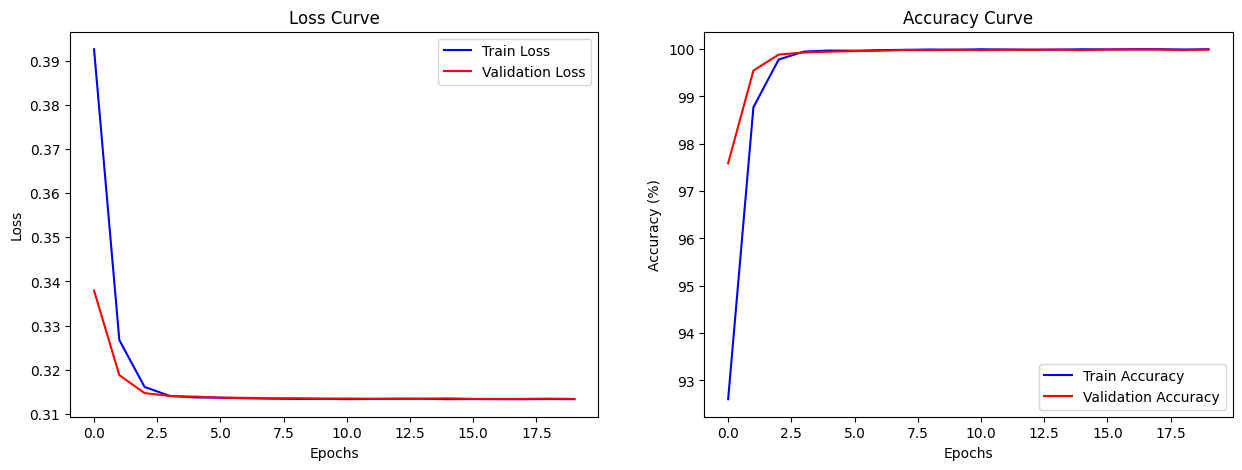

In [ ]:
plot_performance(train_losses_selected_ga, val_losses_selected_ga, train_acc_selected_ga, val_acc_selected_ga)


--- Evaluation Metrics ---
Test Loss: 0.3133
Test Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999

--- Error Metrics ---
Mean Absolute Error (MAE): 0.0001
Mean Squared Error (MSE): 0.0001
Root Mean Squared Error (RMSE): 0.0087
Mean Absolute Percentage Error (MAPE): 0.01%

--- System Resource Utilization ---
CPU Utilization: 2.0%
Memory Usage: 1025660.00 KB

--- Classification Report ---
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     16772
        DDoS       1.00      1.00      1.00     35831

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603



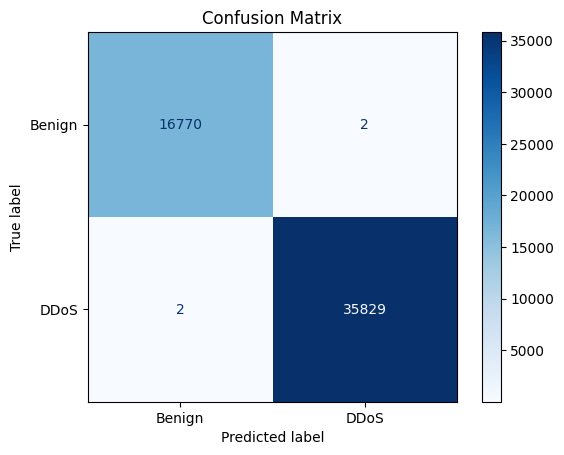

In [ ]:
evaluate_model(model_selected_ga, test_loader_selected_ga)

Model Size

In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/research_paper/unsw_nb15_model.pth')

model_size1 = os.path.getsize('/content/drive/MyDrive/research_paper/unsw_nb15_model.pth') / 1024
print(f"Model Size: {model_size1:.2f} KB")

Model Size: 320.62 KB


In [ ]:
torch.save(model_selected_ga.state_dict(), '/content/drive/MyDrive/research_paper/unsw_nb15_ga_model.pth')

model_size_ga = os.path.getsize('/content/drive/MyDrive/research_paper/unsw_nb15_ga_model.pth') / 1024
print(f"Model Size: {model_size_ga:.2f} KB")

Model Size: 308.67 KB


### Dynamic Quantization model

In [ ]:
import torch.quantization
quantized_model_ga = torch.quantization.quantize_dynamic(
    model_selected_ga,
    {nn.LSTM},
    dtype=torch.qint8
)


--- Evaluation Metrics ---
Test Loss: 0.3133
Test Accuracy: 0.9999
Precision: 0.9999
Recall: 0.9999
F1 Score: 0.9999

--- Error Metrics ---
Mean Absolute Error (MAE): 0.0001
Mean Squared Error (MSE): 0.0001
Root Mean Squared Error (RMSE): 0.0087
Mean Absolute Percentage Error (MAPE): 0.01%

--- System Resource Utilization ---
CPU Utilization: 1.5%
Memory Usage: 1029532.00 KB

--- Classification Report ---
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     16772
        DDoS       1.00      1.00      1.00     35831

    accuracy                           1.00     52603
   macro avg       1.00      1.00      1.00     52603
weighted avg       1.00      1.00      1.00     52603



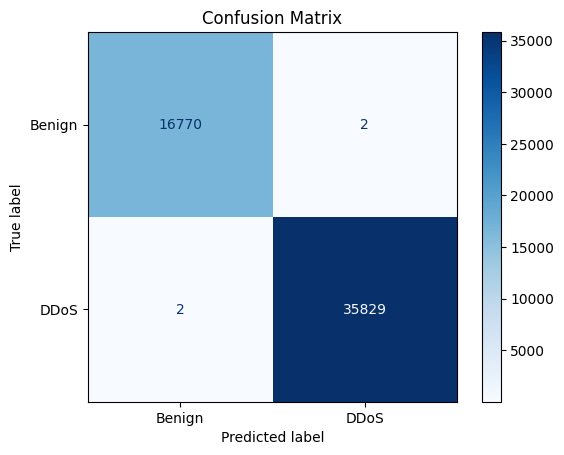

In [ ]:
evaluate_model(quantized_model_ga, test_loader_selected_ga)

In [ ]:
torch.save(quantized_model_ga.state_dict(), '/content/drive/MyDrive/research_paper/unsw_nb15_ga_quantised_model.pth')

quantized_ga_size = os.path.getsize('/content/drive/MyDrive/research_paper/unsw_nb15_ga_quantised_model.pth') / 1024
print(f"Model Size: {quantized_ga_size:.2f} KB")

Model Size: 117.66 KB
